Loaded data from ../Outputs/NVT-1.ener. First few rows:
   0    1          2           3           4           5         6
0  0  0.0  71.038787  298.000000 -341.304174 -270.265387  0.000000
1  1  0.5  67.808256  284.448272 -337.713187 -270.064937  1.084422
2  2  1.0  60.713738  254.687538 -329.900930 -269.669622  0.303056
3  3  1.5  55.406526  232.424362 -323.723054 -269.469951  0.284599
4  4  2.0  54.454305  228.429898 -322.195686 -269.622588  0.287809
Loaded data from ../Outputs/NPT-1.ener. First few rows:
   0    1          2           3           4           5         6
0  0  0.0  71.017893  297.912353 -259.385960 -269.518620  0.000000
1  1  0.5  70.889400  297.373337 -259.354010 -269.524747  1.028806
2  2  1.0  70.546706  295.935774 -259.217127 -269.522176  0.301171
3  3  1.5  70.529239  295.862502 -259.024260 -269.513169  0.330167
4  4  2.0  70.413938  295.378827 -258.906199 -269.506991  0.302331
Plot saved at: ../Figures/potential_energy_vs_time.png


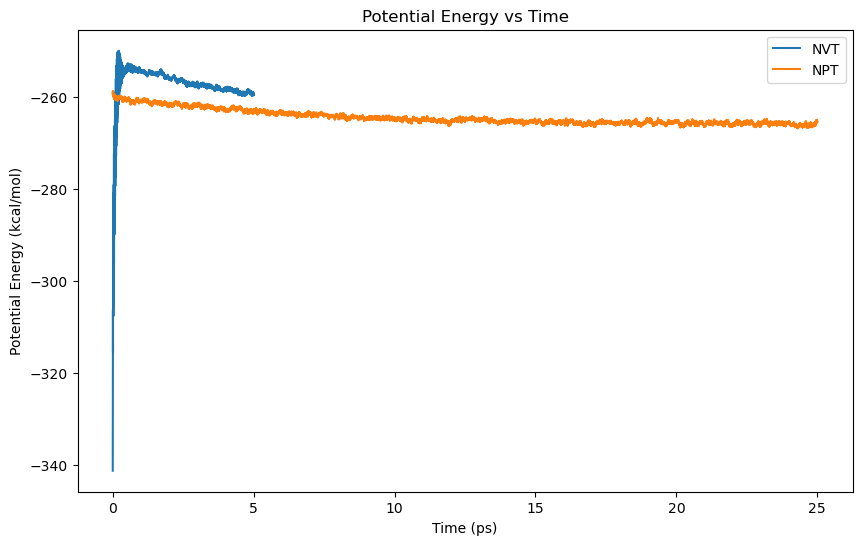

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define file paths
nvt_file = '../Outputs/NVT-1.ener'
npt_file = '../Outputs/NPT-1.ener'

# Define output path for the plot
output_path = 'Figures/potential_energy_vs_time.png'

# Function to load and process .ener files
def load_energy_file(file_path):
    try:
        # Load the file while skipping any headers or metadata
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None)
        print(f"Loaded data from {file_path}. First few rows:")
        print(data.head())
        return data
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {file_path}. Check the file format.")
    return None

# Load the energy files
nvt_data = load_energy_file(nvt_file)
npt_data = load_energy_file(npt_file)

# Check if data is successfully loaded
if nvt_data is not None and npt_data is not None:
    # Convert the time from femtoseconds to picoseconds (divide by 1000)
    nvt_data[1] = nvt_data[1] / 1000  # Time in ps
    npt_data[1] = npt_data[1] / 1000  # Time in ps

    # Assume columns 1 and 4 are time and potential energy
    plt.figure(figsize=(10, 6))
    plt.plot(nvt_data[1], nvt_data[4], label='NVT')
    plt.plot(npt_data[1], npt_data[4], label='NPT')
    plt.xlabel('Time (ps)')  # Label in ps
    plt.ylabel('Potential Energy (kcal/mol)')
    plt.legend()
    plt.title('Potential Energy vs Time')

    # Save plot to Figures/ directory
    plt.savefig('../Figures/potential_energy_vs_time.png')  # Save plot before showing it
    print(f"Plot saved at: ../Figures/potential_energy_vs_time.png")
    plt.show()  # Display the plot
else:
    print("Error: Could not plot due to missing or invalid data.")

In [2]:
pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


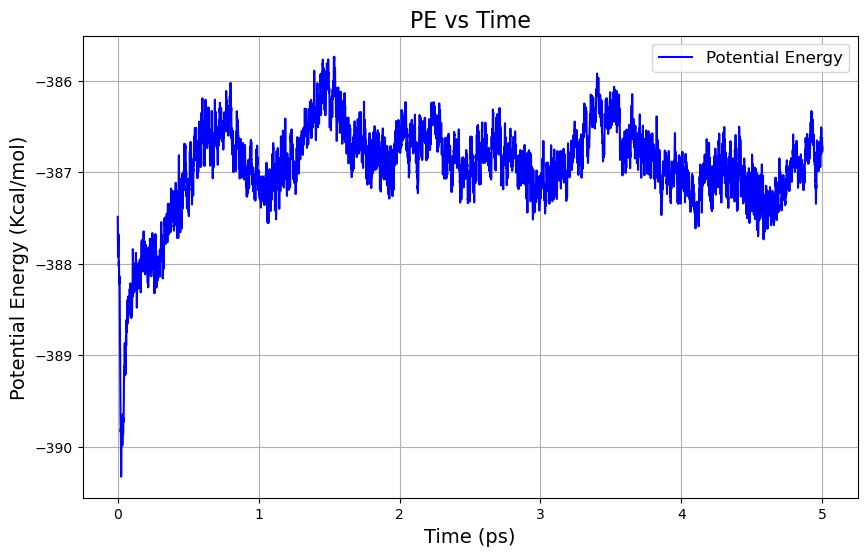

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set paths to the energy files
monitor_energy_file = "../Outputs/monitor/MONITOR-1.ener"


# Define a function to read GROMACS .xvg files
def read_xvg(file_path):
    """Reads a GROMACS .xvg energy file and returns time and potential energy."""
    times = []
    energies = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and legend lines
            if line.startswith(('#', '@')):
                continue
            # Parse time and energy
            data = line.split()
            times.append(float(data[1])) # in fs
            energies.append(float(data[4]))
    return np.array(times) / 1000, np.array(energies)

# Load energy data
time, energy = read_xvg(monitor_energy_file)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time, energy, label='Potential Energy', color='blue')

# Add labels, title, and legend
plt.title("PE vs Time", fontsize=16)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Potential Energy (Kcal/mol)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../Figures/qmmm_energy_vs_time.png", dpi=300)
plt.show()